# Analysis

## Environment Preparation

In [180]:
# import libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
from datetime import datetime
import data_prep

## Preprocessing

In [181]:
# List all data files which should be preprocessed
data_files = ['data_nora.csv', 'data_clara.csv'] # , 'data_nora.csv'

In [182]:
# Call preprocessing function and store data in one data df
data = data_prep.prepare_data(data_files)

In [183]:
# Create trial index per participant 
data['trial_index_within_participant'] = data.groupby('participant').cumcount() + 1

In [184]:
# Detele practice trials and create practice subset
practice_trials = data[data['block'] == 'Test']
data = data[data['block'] != 'Test']

## Summary Stats

Trials without practice trials, check counterbalancing

In [185]:
# Identifier condition
data.groupby(['participant','identifier_chooser_owner_value_corr']).describe()

session                      \
                                                  count mean  std  min  25%   
participant identifier_chooser_owner_value_corr                               
266736      cozmo_cozmo_lose                       50.0  1.0  0.0  1.0  1.0   
            cozmo_cozmo_win                        46.0  1.0  0.0  1.0  1.0   
            cozmo_you_lose                         46.0  1.0  0.0  1.0  1.0   
            cozmo_you_win                          50.0  1.0  0.0  1.0  1.0   
            you_cozmo_lose                         51.0  1.0  0.0  1.0  1.0   
            you_cozmo_win                          45.0  1.0  0.0  1.0  1.0   
            you_you_lose                           47.0  1.0  0.0  1.0  1.0   
            you_you_win                            49.0  1.0  0.0  1.0  1.0   
852838      cozmo_cozmo_lose                       50.0  1.0  0.0  1.0  1.0   
            cozmo_cozmo_win                        46.0  1.0  0.0  1.0  1.0   
            cozmo_you_lose                         46.0  1.0  0.0  1.0  1.0   
            cozmo_you_win                          50.0  1.0  0.0  1.0  1.0   
            you_cozmo_lose                         51.0  1.0  0.0  1.0  1.0   
            you_cozmo_win                          45.0  1.0  0.0  1.0  1.0   
            you_you_lose                           47.0  1.0  0.0  1.0  1.0   
            you_you_win                            49.0  1.0  0.0  1.0  1.0   

                                                               trial  \
                                                 50%  75%  max count   
participant identifier_chooser_owner_value_corr                        
266736      cozmo_cozmo_lose                     1.0  1.0  1.0  50.0   
            cozmo_cozmo_win                      1.0  1.0  1.0  46.0   
            cozmo_you_lose                       1.0  1.0  1.0  46.0   
            cozmo_you_win                        1.0  1.0  1.0  50.0   
            you_cozmo_lose                       1.0  1.0  1.0  51.0   
            you_cozmo_win                        1.0  1.0  1.0  45.0   
            you_you_lose                         1.0  1.0  1.0  47.0   
            you_you_win                          1.0  1.0  1.0  49.0   
852838      cozmo_cozmo_lose                     1.0  1.0  1.0  50.0   
            cozmo_cozmo_win                      1.0  1.0  1.0  46.0   
            cozmo_you_lose                       1.0  1.0  1.0  46.0   
            cozmo_you_win                        1.0  1.0  1.0  50.0   
            you_cozmo_lose                       1.0  1.0  1.0  51.0   
            you_cozmo_win                        1.0  1.0  1.0  45.0   
            you_you_lose                         1.0  1.0  1.0  47.0   
            you_you_win                          1.0  1.0  1.0  49.0   

                                                            ...  \
                                                      mean  ...   
participant identifier_chooser_owner_value_corr             ...   
266736      cozmo_cozmo_lose                      7.260000  ...   
            cozmo_cozmo_win                       5.673913  ...   
            cozmo_you_lose                       11.239130  ...   
            cozmo_you_win                         9.820000  ...   
            you_cozmo_lose                       23.254902  ...   
            you_cozmo_win                        21.644444  ...   
            you_you_lose                         27.340426  ...   
            you_you_win                          25.693878  ...   
852838      cozmo_cozmo_lose                      7.260000  ...   
            cozmo_cozmo_win                       5.673913  ...   
            cozmo_you_lose                       11.239130  ...   
            cozmo_you_win                         9.820000  ...   
            you_cozmo_lose                       23.254902  ...   
            you_cozmo_win                        21.644444  ...   
            you_you_lose              

In [186]:
# Colors
data.groupby(['participant','left_color']).describe()

session                                     \
                                   count mean  std  min  25%  50%  75%  max   
participant left_color                                                        
266736      images/stim10_5.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim11_6.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim12_6.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim13_7.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim14_7.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim15_8.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim16_8.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim17_9.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim18_9.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim19_10.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim1_1.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim20_10.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim21_11.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim22_11.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim23_12.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim24_12.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim2_1.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim3_2.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim4_2.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim5_3.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim6_3.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim7_4.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim8_4.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim9_5.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
852838      images/stim10_5.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim11_6.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim12_6.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim13_7.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim14_7.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim15_8.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim16_8.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim17_9.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim18_9.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim19_10.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim1_1.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim20_10.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim21_11.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim22_11.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim23_12.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim24_12.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim2_1.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim3_2.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim4_2.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim5_3.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim6_3.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim7_4.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim8_4.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim9_5.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   

   

In [187]:
# Choice location per chooser
data.groupby(['participant','chooser','choice_location']).describe()

session                                \
                                      count mean  std  min  25%  50%  75%   
participant chooser choice_location                                         
266736      cozmo   left               96.0  1.0  0.0  1.0  1.0  1.0  1.0   
                    right              96.0  1.0  0.0  1.0  1.0  1.0  1.0   
            you     left               98.0  1.0  0.0  1.0  1.0  1.0  1.0   
                    right              94.0  1.0  0.0  1.0  1.0  1.0  1.0   
852838      cozmo   left               96.0  1.0  0.0  1.0  1.0  1.0  1.0   
                    right              96.0  1.0  0.0  1.0  1.0  1.0  1.0   
            you     left               98.0  1.0  0.0  1.0  1.0  1.0  1.0   
                    right              94.0  1.0  0.0  1.0  1.0  1.0  1.0   

                                         trial             ...  \
                                     max count       mean  ...   
participant chooser choice_location                        ...   
266736      cozmo   left             1.0  96.0  11.833333  ...   
                    right            1.0  96.0   5.166667  ...   
            you     left             1.0  98.0  24.336735  ...   
                    right            1.0  94.0  24.670213  ...   
852838      cozmo   left             1.0  96.0  11.833333  ...   
                    right            1.0  96.0   5.166667  ...   
            you     left             1.0  98.0  24.938776  ...   
                    right            1.0  94.0  24.042553  ...   

                                    owner_confirm_rt         index_corr  \
                                                 75%     max      count   
participant chooser choice_location                                       
266736      cozmo   left                    0.540375  0.7694       96.0   
                    right                   0.556750  0.9657       96.0   
            you     left                    0.519875  0.9621       98.0   
                    right                   0.515475  0.8922       94.0   
852838      cozmo   left                    0.654875  0.9246       96.0   
                    right                   0.650350  0.8910       96.0   
            you     left                    0.613225  0.9577       98.0   
                    right                   0.638500  0.8768       94.0   

                                                                           \
                                           mean         std   min     25%   
participant chooser choice_location                                         
266736      cozmo   left             209.281250  111.226720  22.0  119.00   
                    right            208.260417  111.603739  19.0  112.00   
            you     left             204.448980  110.654484  18.0  110.50   
                    right            216.255319  111.941127  24.0  119.00   
852838      cozmo   left             204.937500  111.403752  14.0  112.50   
                    right            206.427083  112.140208  18.0  110.50   
            you     left             217.142857  113.753577  16.0  118.75   
                    right            192.989362  106.840802  22.0  107.25   

                                                           
                                       50%     75%    max  
participant chooser choice_location                        
266736      cozmo   left             210.0  305.25  398.0  
                    right            210.0  301.50  401.0  
            you     left             199.0  301.75  400.0  
                    right            217.5  323.50  399.0  
852838      cozmo   left             205.0  298.25  393.0  
                    right            203.0  301.50  394.0  
            you     left             219.0  317.25  397.0  
                    right            178.0  291.75  396.0  

[8 rows x 40 columns]

In [188]:
# Outcome value --> is ne not corrected "value" -> 10% rule applies only later therefore it makes sense that its equally distributed
data.groupby(['participant','value']).describe()

session                                     trial        \
                    count mean  std  min  25%  50%  75%  max  count  mean   
participant value                                                           
266736      lose    192.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  192.0  17.5   
            win     192.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  192.0  15.5   
852838      lose    192.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  192.0  17.5   
            win     192.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  192.0  15.5   

                   ... owner_confirm_rt         index_corr              \
                   ...              75%     max      count        mean   
participant value  ...                                                   
266736      lose   ...         0.542400  0.9657      192.0  210.302083   
            win    ...         0.524125  0.8922      192.0  208.697917   
852838      lose   ...         0.647875  0.9577      192.0  205.302083   
            win    ...         0.642950  0.9509      192.0  205.697917   

                                                                   
                          std   min     25%    50%     75%    max  
participant value                                                  
266736      lose   111.325204  18.0  113.50  210.0  306.25  401.0  
            win    110.950026  20.0  115.25  207.5  303.00  399.0  
852838      lose   111.168343  17.0  110.50  206.5  300.50  397.0  
            win    111.112661  14.0  109.50  205.0  301.50  396.0  

[4 rows x 40 columns]

In [189]:
# 10% Samples
data.groupby(['participant','value_distribution']).describe()

session                                     \
                                 count mean  std  min  25%  50%  75%  max   
participant value_distribution                                              
266736      10.0                  36.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            90.0                 348.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
852838      10.0                  36.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            90.0                 348.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   

                                trial             ... owner_confirm_rt  \
                                count       mean  ...              75%   
participant value_distribution                    ...                    
266736      10.0                 36.0  16.750000  ...         0.507725   
            90.0                348.0  16.474138  ...         0.541250   
852838      10.0                 36.0  16.750000  ...         0.689375   
            90.0                348.0  16.474138  ...         0.642550   

                                       index_corr                          \
                                   max      count        mean         std   
participant value_distribution                                              
266736      10.0                0.6749       36.0  210.250000  111.349482   
            90.0                0.9657      348.0  209.422414  111.119311   
852838      10.0                0.8934       36.0  207.611111  113.674040   
            90.0                0.9577      348.0  205.281609  110.879642   

                                                                    
                                 min     25%    50%     75%    max  
participant value_distribution                                      
266736      10.0                29.0  114.25  212.0  303.25  384.0  
            90.0                18.0  113.75  209.5  305.25  401.0  
852838      10.0                27.0  123.25  211.0  302.50  397.0  
            90.0                14.0  109.75  205.5  301.25  396.0  

[4 rows x 32 columns]

In [190]:
# Chooser owner
data.groupby(['participant','chooser','owner']).describe()

session                                    trial  \
                            count mean  std  min  25%  50%  75%  max count   
participant chooser owner                                                    
266736      cozmo   cozmo    96.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  96.0   
                    you      96.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  96.0   
            you     cozmo    96.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  96.0   
                    you      96.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  96.0   
852838      cozmo   cozmo    96.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  96.0   
                    you      96.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  96.0   
            you     cozmo    96.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  96.0   
                    you      96.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  96.0   

                                 ... owner_confirm_rt         index_corr  \
                           mean  ...              75%     max      count   
participant chooser owner        ...                                       
266736      cozmo   cozmo   6.5  ...         0.545600  0.8702       96.0   
                    you    10.5  ...         0.543075  0.9657       96.0   
            you     cozmo  22.5  ...         0.518175  0.9621       96.0   
                    you    26.5  ...         0.513975  0.8922       96.0   
852838      cozmo   cozmo   6.5  ...         0.686025  0.9176       96.0   
                    you    10.5  ...         0.608475  0.9246       96.0   
            you     cozmo  22.5  ...         0.698425  0.9577       96.0   
                    you    26.5  ...         0.550600  0.8422       96.0   

                                                                        \
                                 mean         std   min     25%    50%   
participant chooser owner                                                
266736      cozmo   cozmo  210.000000  111.858557  22.0  113.75  209.5   
                    you    207.541667  110.959065  19.0  112.75  214.5   
            you     cozmo  210.958333  112.745724  24.0  115.00  212.5   
                    you    209.500000  110.122324  18.0  114.50  208.0   
852838      cozmo   cozmo  205.666667  111.724913  17.0  109.00  205.0   
                    you    205.697917  111.825251  14.0  111.25  205.0   
            you     cozmo  205.531250  109.912880  16.0  111.75  206.0   
                    you    205.104167  112.252580  19.0  105.75  205.5   

                                          
                              75%    max  
participant chooser owner                 
266736      cozmo   cozmo  307.00  398.0  
                    you    300.75  401.0  
            you     cozmo  303.00  400.0  
                    you    305.75  392.0  
852838      cozmo   cozmo  300.50  394.0  
                    you    301.50  393.0  
            you     cozmo  298.75  386.0  
                    you    299.75  397.0  

[8 rows x 40 columns]

In [203]:
# Reaction time summary stats
data['owner_confirm_rt'].describe()

count    768.000000
mean       0.519879
std        0.136164
min        0.086600
25%        0.428600
50%        0.514000
75%        0.602250
max        0.965700
Name: owner_confirm_rt, dtype: float64

## Analysis

In [191]:
# Clean from rows where response was too slow or wrong 
#TODO: discuss what we want to sort out?
data_n = data[(data['bool_slow_color_choice_or_confirm'] == False) & 
            (data['bool_wrong_color_confirm'] == False) & 
            (data['bool_slow_owner_confirm'] == False) & 
            (data['bool_wrong_owner_confirm'] == False)]

In [192]:
# Store preprocessed data in csv
data.to_csv('/Users/anja/Desktop/data_mt/output_data.csv', index=False)

In [193]:
# Mean age, handedness, gender?

In [194]:
# Normal distribution of reaction time? Any outliers?

<Axes: xlabel='identifier_chooser_owner_value_corr', ylabel='owner_confirm_rt'>

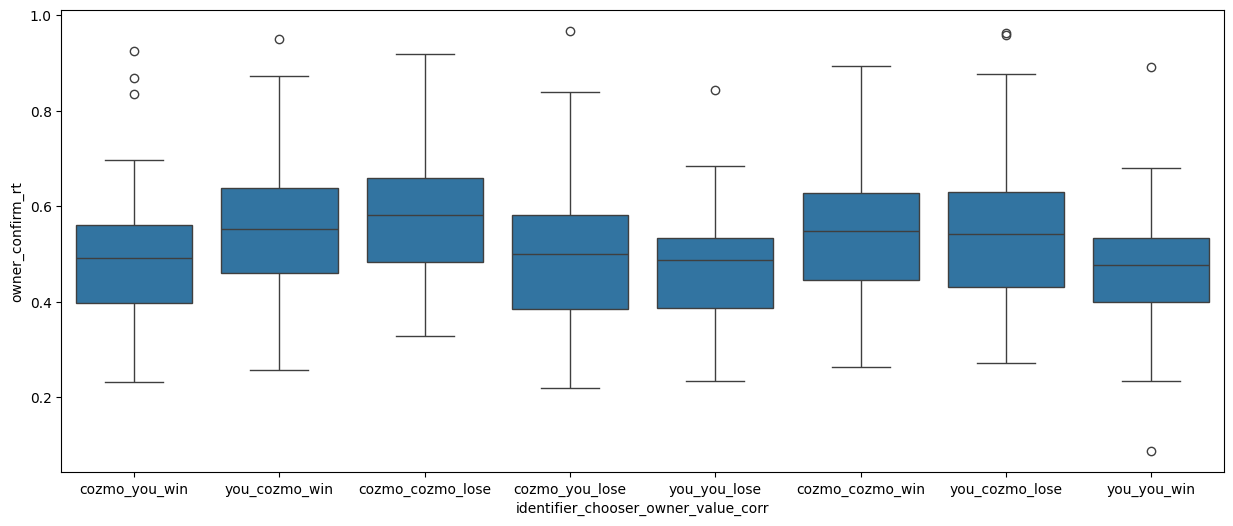

In [195]:
# Reaction time per condition group 
#TODO:change to violin plot when more data is available https://python-graph-gallery.com/39-hidden-data-under-boxplot/
plt.figure(figsize=(15, 6)) 
sns.boxplot( x=data["identifier_chooser_owner_value_corr"], y=data["owner_confirm_rt"] )

In [196]:
# how does reaction time develope over time? learing effects? do get people faster? 

In [197]:
# do people prefer one choice? i mean by side? Are they faster by one side? maybe related to handedness?

In [198]:
# Als variable anschauen wie viel gewinn oder Verlust Cozmo schon hatte.


In [ ]:
# is it easier to give when cozmo anyways has a lower balance than have?